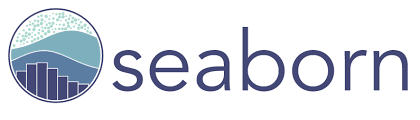

# Seaborn
---

matplotlib 라이브러리는 파이썬의 핵심 기초 plotting 도구입니다. 우리는 이러한 matplotlib에 기반하여 한 단계 높은 수준의 인터페이스를 제공하는 seaborn 라이브러리를 이번 파트에서 배워보겠습니다. 좀 더 전문적인 plot을 다루기 때문에 설명적(explanatory) plotting에 더 유용합니다.

# Import Library
----

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [17]:
# load a copy of the tips dataset
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Barplot
---

- Barplot을 이용하면 카테고리형 변수를 집계해서 시각화 할 수 있습니다.
- Ex) 요일에 따른 tip의 수치 비교

<AxesSubplot:xlabel='day', ylabel='tip'>

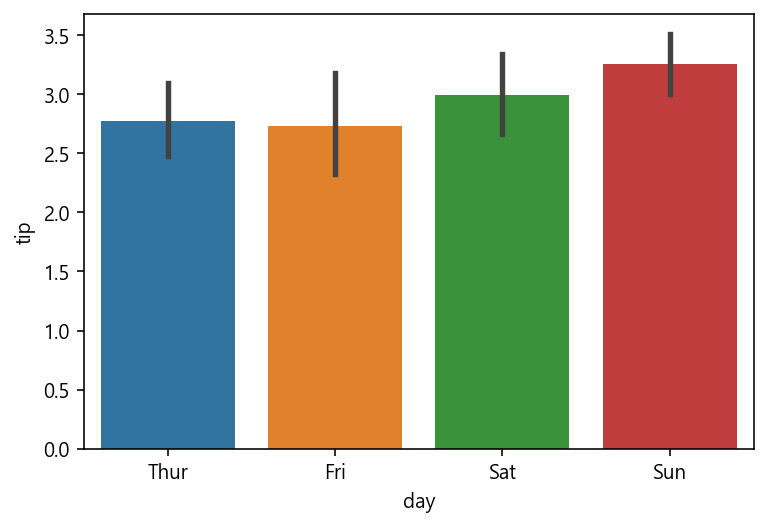

In [23]:
sns.barplot(data=tips, x='day', y='tip') # 수직 막대그래프

<AxesSubplot:xlabel='tip', ylabel='day'>

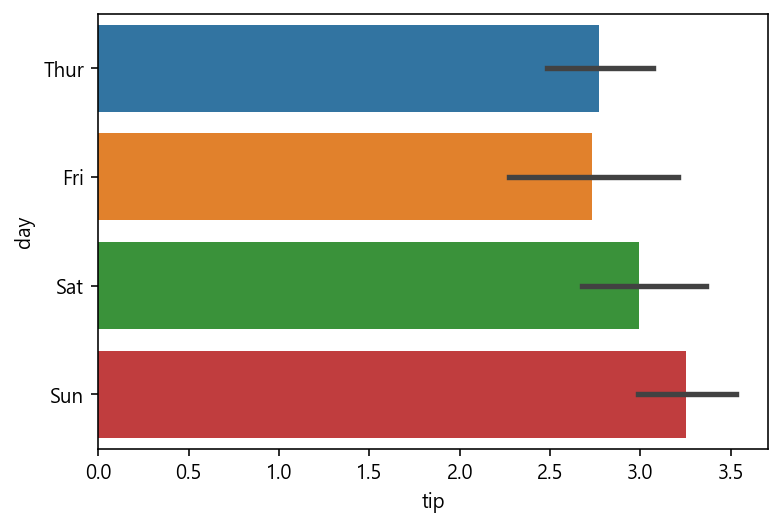

In [42]:
sns.barplot(data=tips, y='day', x='tip') # 수평 막대그래프

- 위처럼 seaborn의 barplot은 기본적으로 error bar가 함께 나타납니다.

Error Bar는 부트 스트랩 신뢰구간(Bootstrap Confidence interval)을 이용해 해당 데이터를 기반으로 유사한 상황의 95%가 이 범위 내에서 결과를 얻는다는 것읗 의미합니다.


위 신뢰구간은 mean(평균), median(중앙값), mode(최빈값) 등 다른 값들을 함께 고려해서 계산하기에 신뢰도가 높습니다.

<AxesSubplot:xlabel='day', ylabel='tip'>

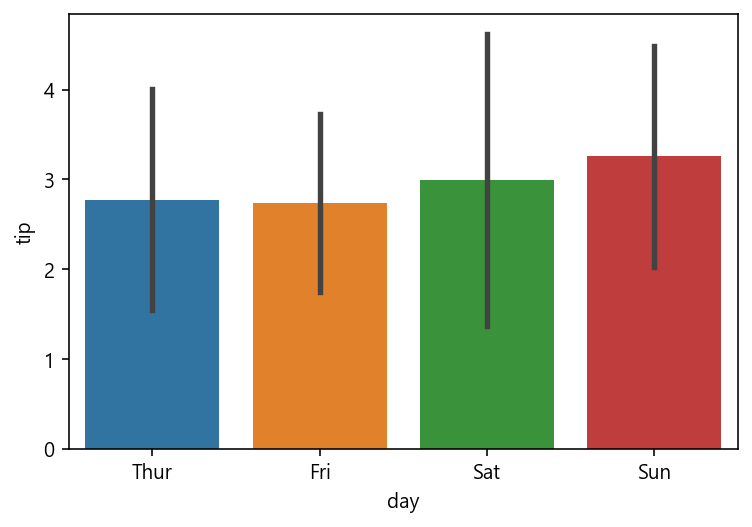

In [24]:
sns.barplot(data=tips, x='day', y='tip', ci='sd') # error bar를 표준편차로 그리고 싶다면?

# Stacked Bar Chart
---

stacked bar chart는 아래와 같이 사용하는 것이 편합니다.

In [40]:
tips.groupby('sex').mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


<AxesSubplot:xlabel='sex'>

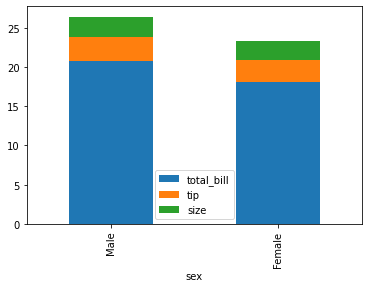

In [42]:
tips.groupby('sex').mean().plot(kind='bar', stacked=True)

# hue parameter
---

- hue 파라미터를 이용하면 또 다른 카테고리형 변수를 추가해서 시각화 할 수 있습니다.

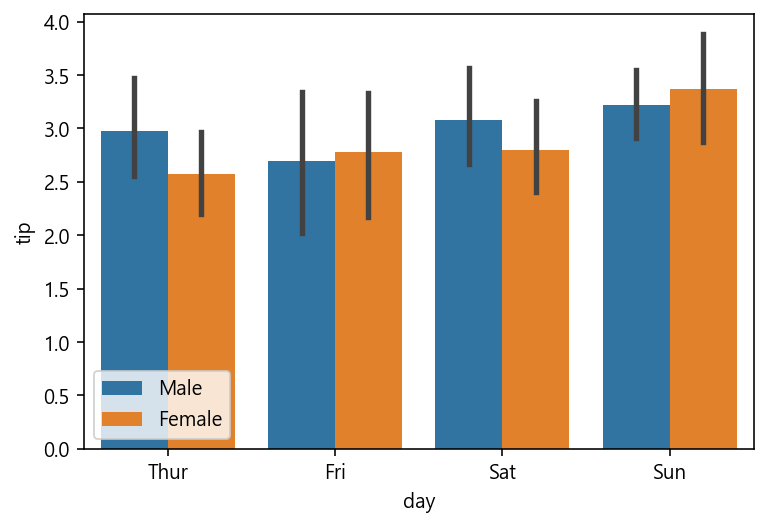

In [41]:
sns.barplot(data=tips, x='day', y='tip', hue='sex')
plt.legend(loc=3) # 범례 위치 변경

# palette
---

- pallete를 이용하면 차트의 컬러를 변경할 수 있습니다.

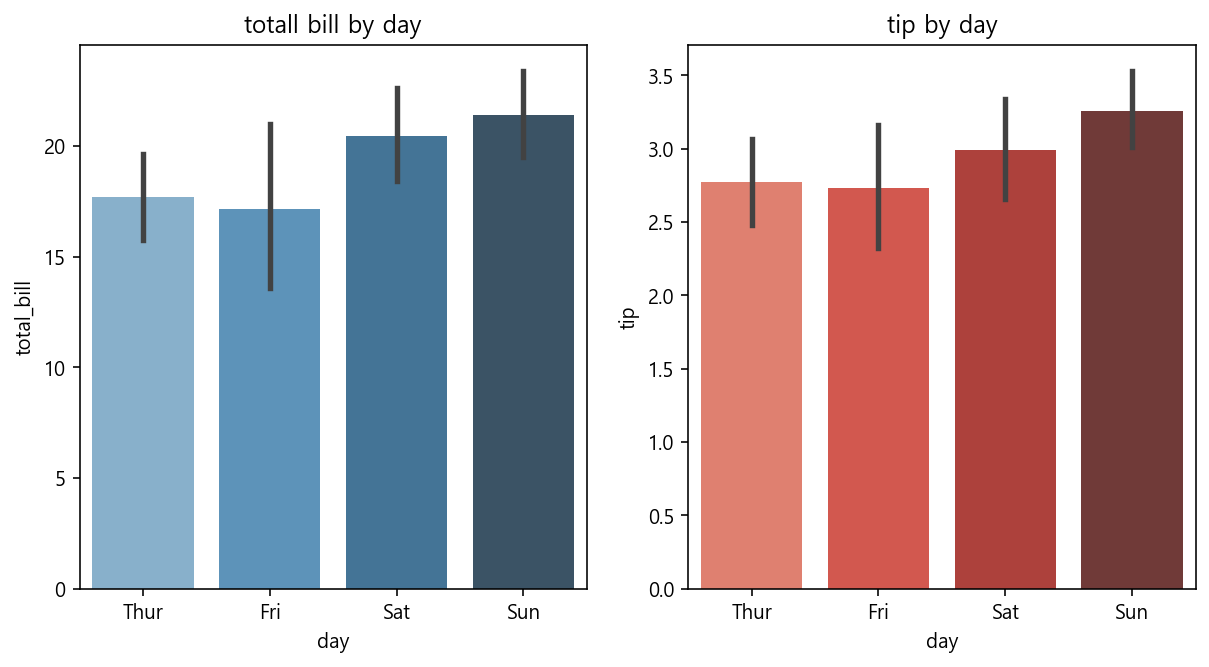

In [37]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title('totall bill by day')
sns.barplot(x="day", y="total_bill", data=tips,
                 palette="Blues_d")

plt.subplot(122)
plt.title('tip by day')
sns.barplot(x="day", y="tip", data=tips,
                 palette="Reds_d")

plt.show()

# Lineplot
---

lineplot은 시계열 데이터를 다룰 때 가장 많이 사용되는 plot입니다.

https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [58]:
flights = sns.load_dataset("flights")

flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='passengers'>

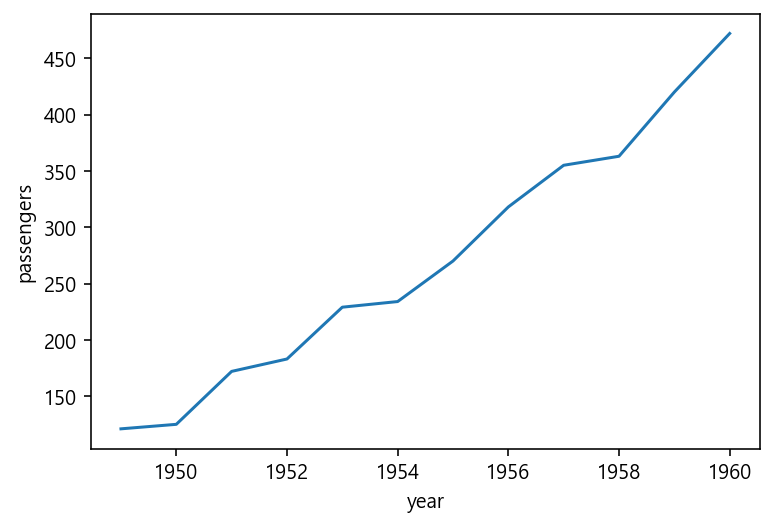

In [60]:
# 5월에 해당하는 항공데이터만 추출

may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

In [62]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<AxesSubplot:xlabel='year'>

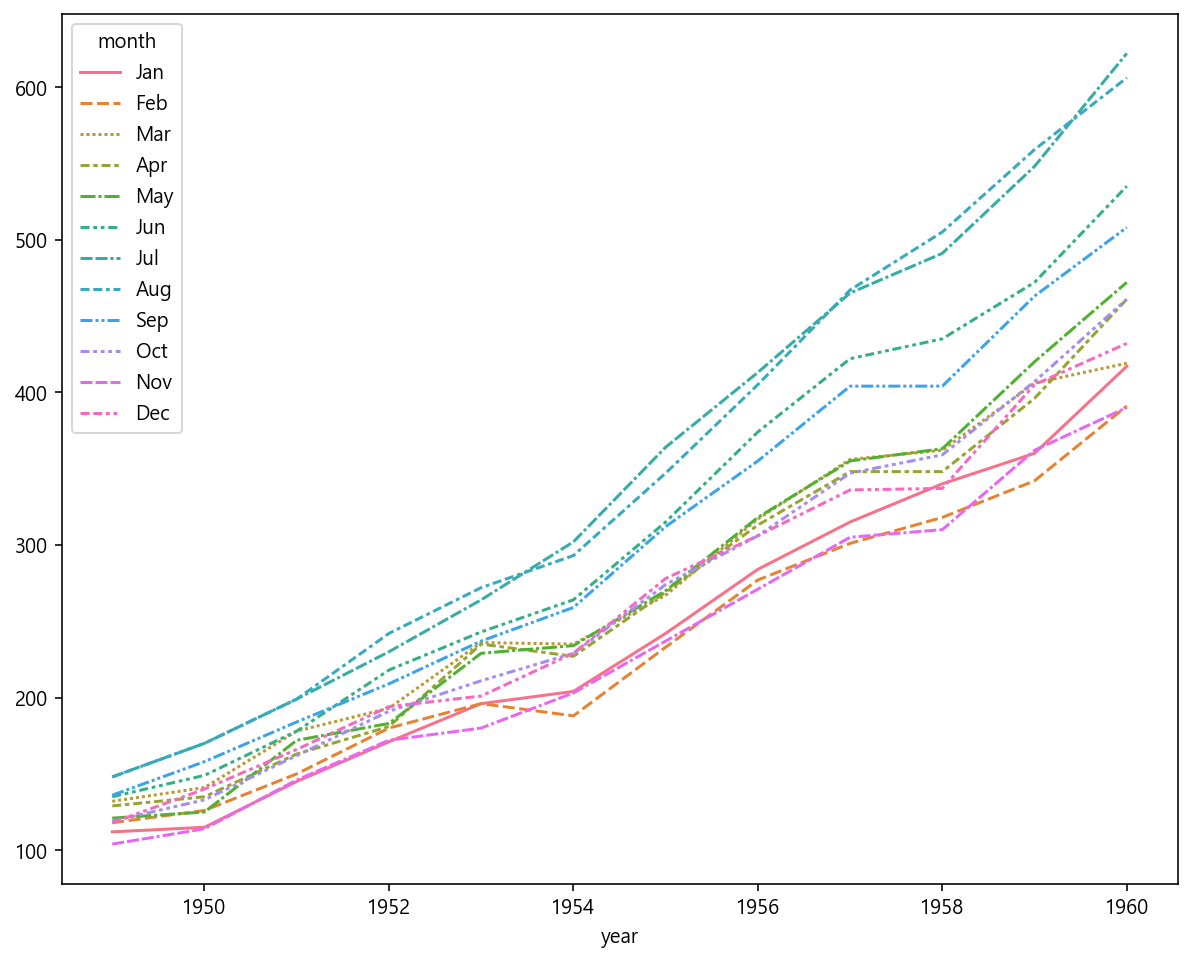

In [64]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=flights_wide)

In [65]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


# Distplot
----

https://seaborn.pydata.org/generated/seaborn.distplot.html

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

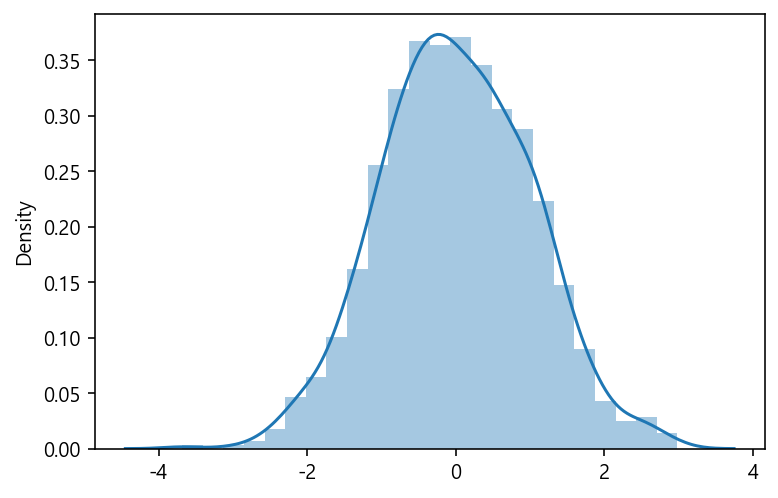

In [72]:
x = np.random.randn(1000) # 정규분포를 따르는 난수 생성
sns.distplot(x)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

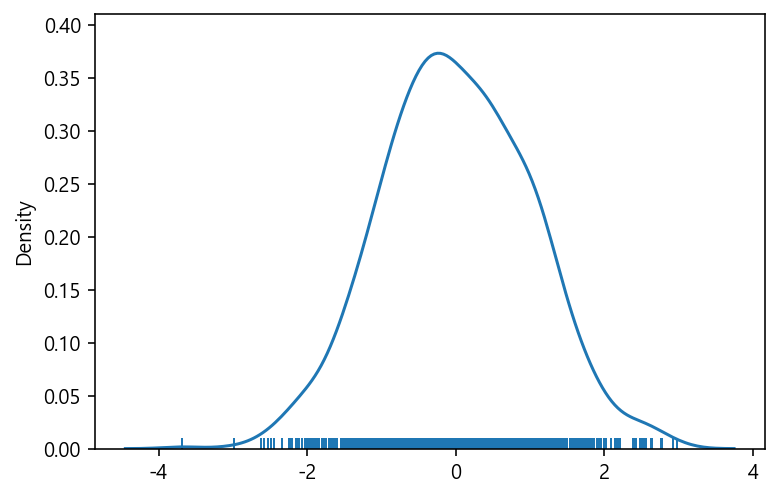

In [73]:
sns.distplot(x, rug=True, hist=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density'>

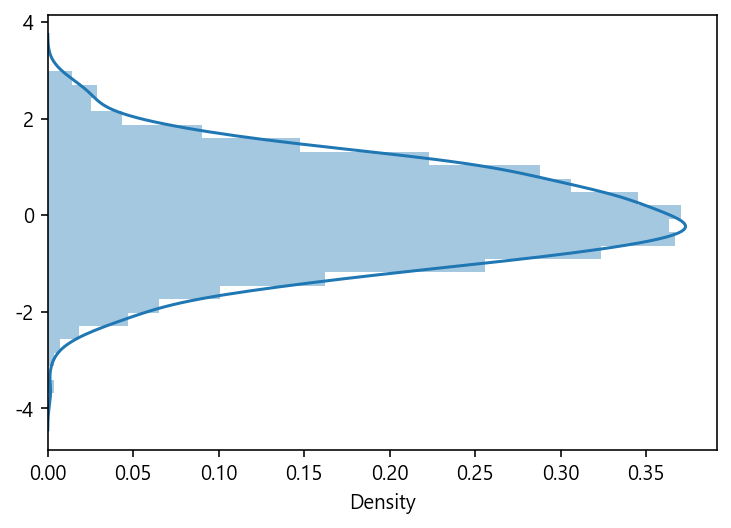

In [74]:
sns.distplot(x, vertical=True)

# Stacked Histogram by Label
---

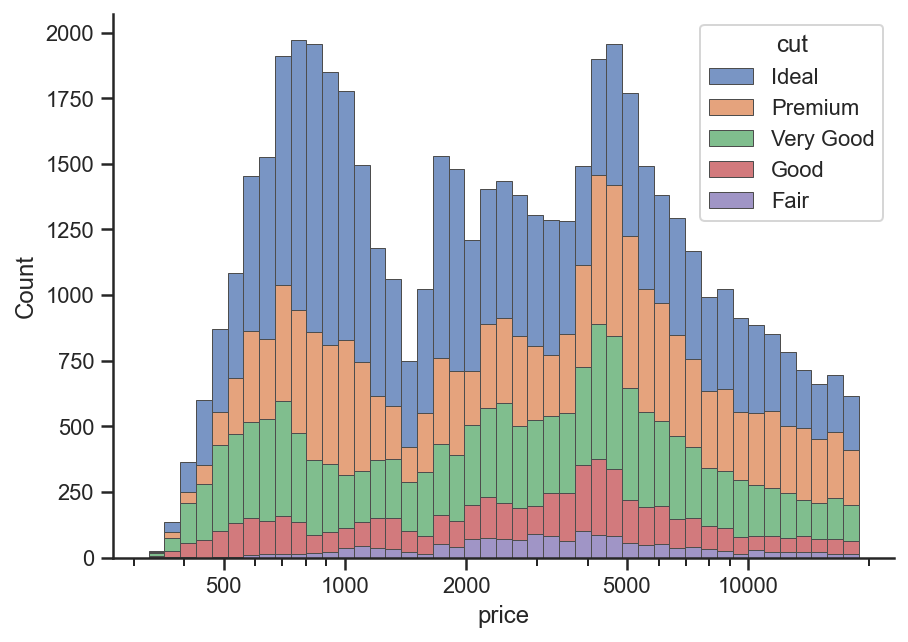

In [86]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

# relplot
---

https://seaborn.pydata.org/generated/seaborn.relplot.html

relplot은 scatterplot과 lineplot의 상위 개념으로 산점도와 선 그래프를 모두 그릴 수 있습니다.

방법) replot(kind='scatter') or replot(kind='line')

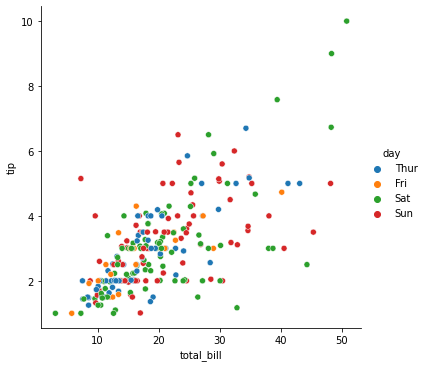

In [18]:
# relplot은 쉽게 산점도라고 생각합시다.
# hue 파라미터를 day로 지정해 요일별로 색을 다르게 dot을 찍을 수 있습니다.

sns.relplot(data=tips, x="total_bill", y="tip", hue="day")

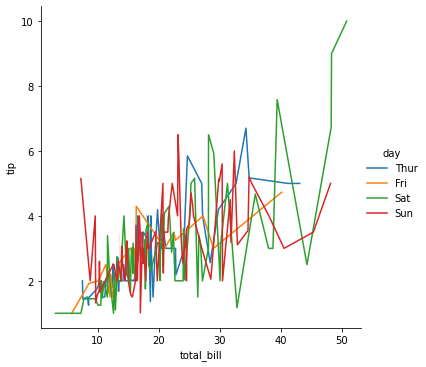

In [19]:
# relplot은 쉽게 산점도라고 생각합시다.
# hue 파라미터를 day로 지정해 요일별로 색을 다르게 dot을 찍을 수 있습니다.

sns.relplot(data=tips, x="total_bill", y="tip", hue="day", kind='line')

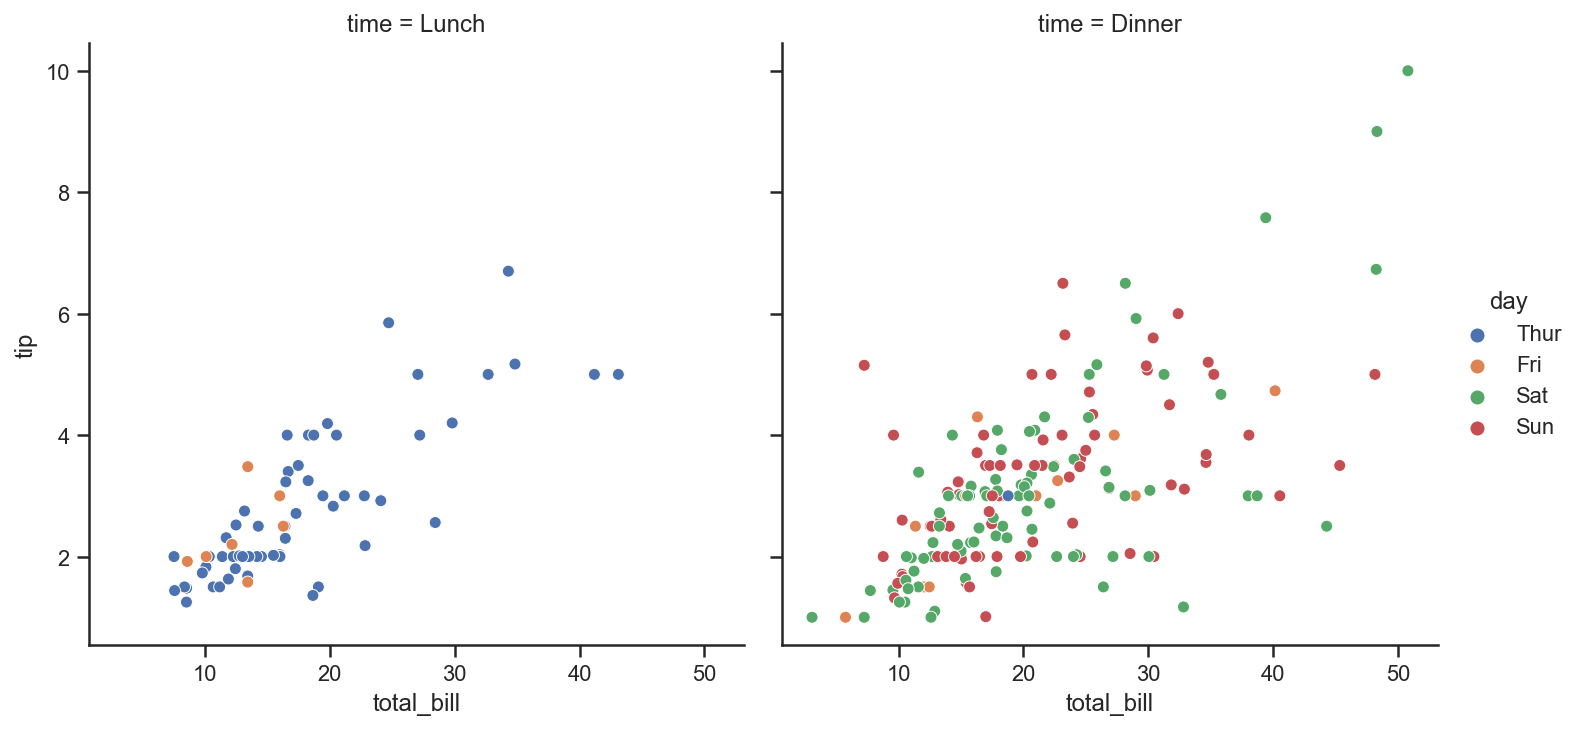

In [101]:
# plt.subplot을 이용하는 방법도 있지만 쉽게 파라미터로 차트를 구분할 필드를 입력하면 아래와 같은
# 차트를 쉽게 그릴 수 있습니다.

sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time")

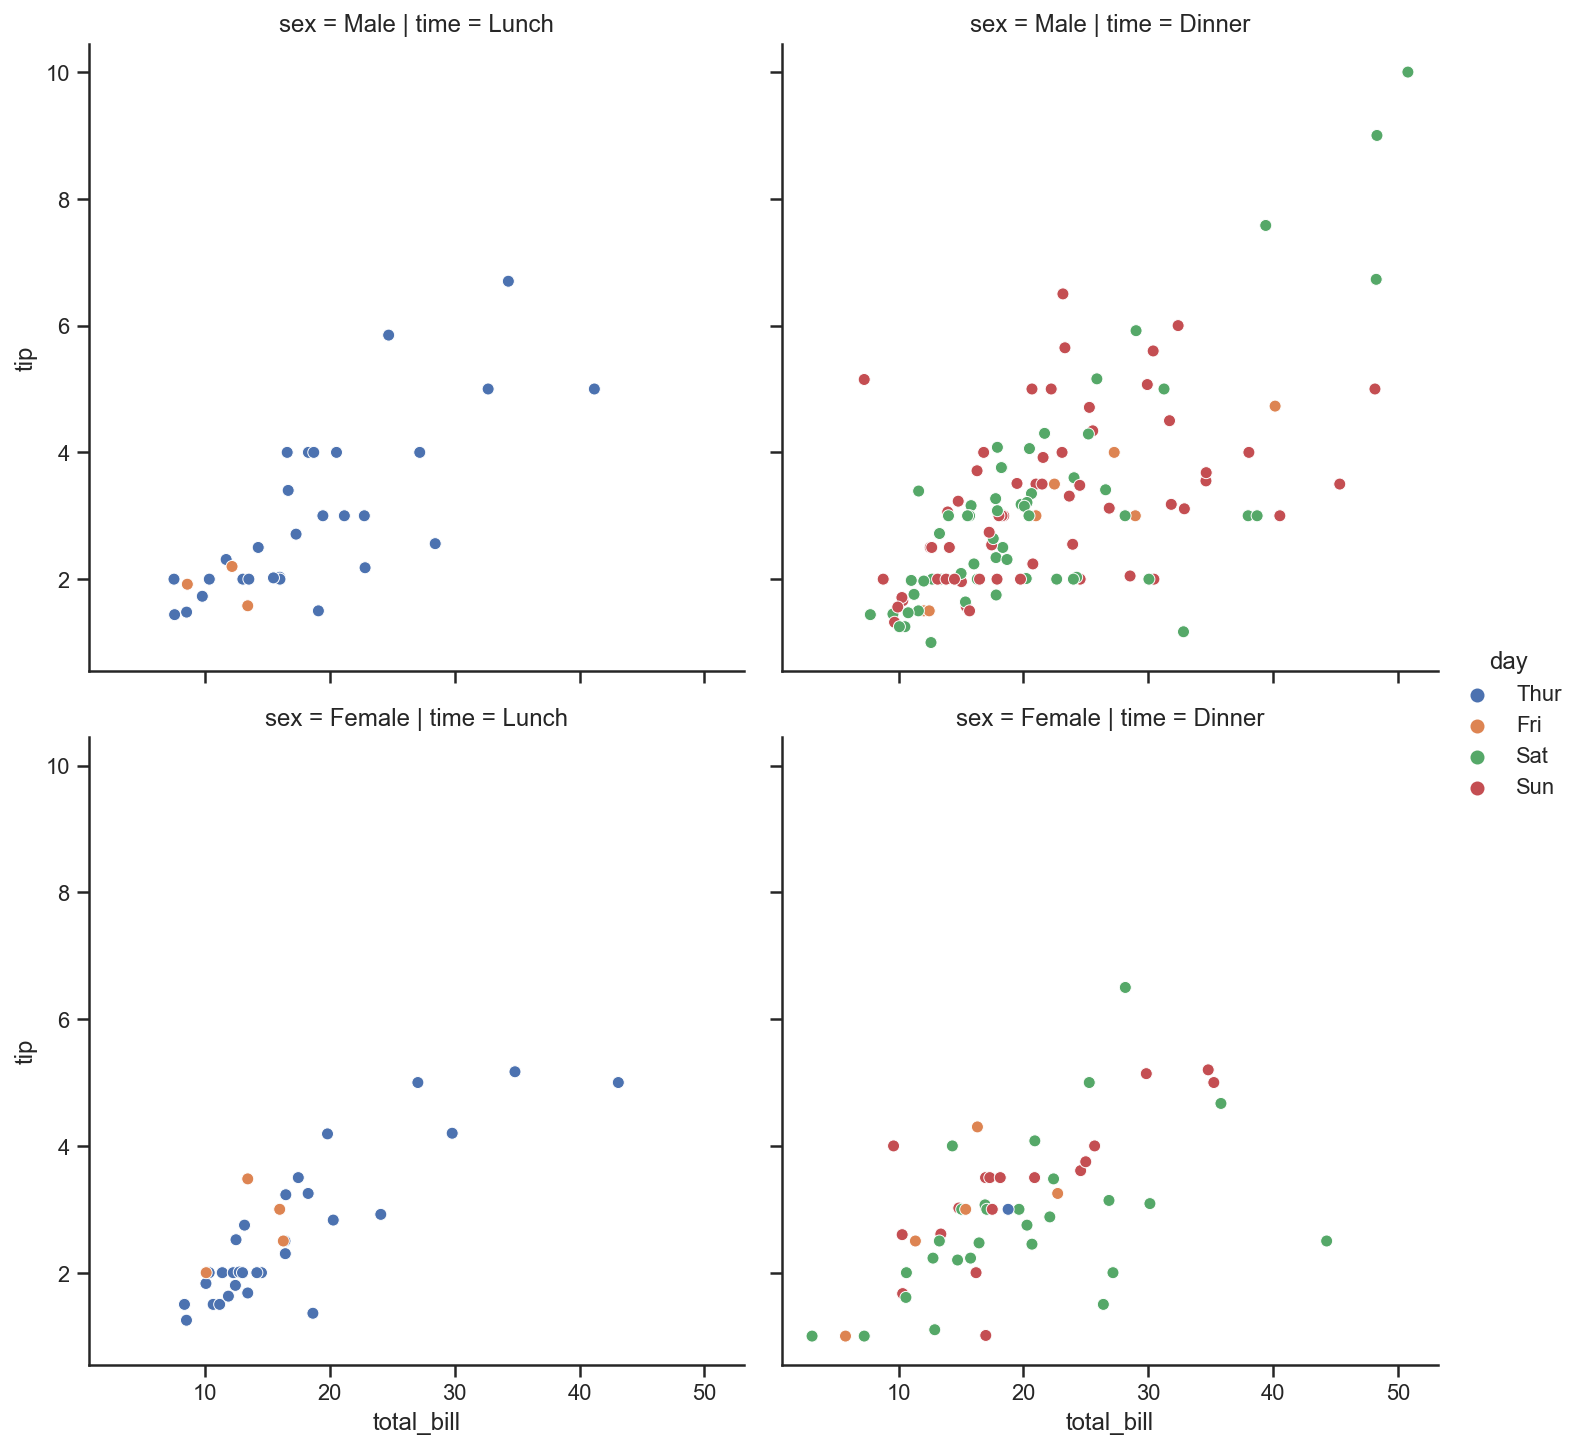

In [102]:
# column이 있다면 row 인자도 있겠죠??

sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex")

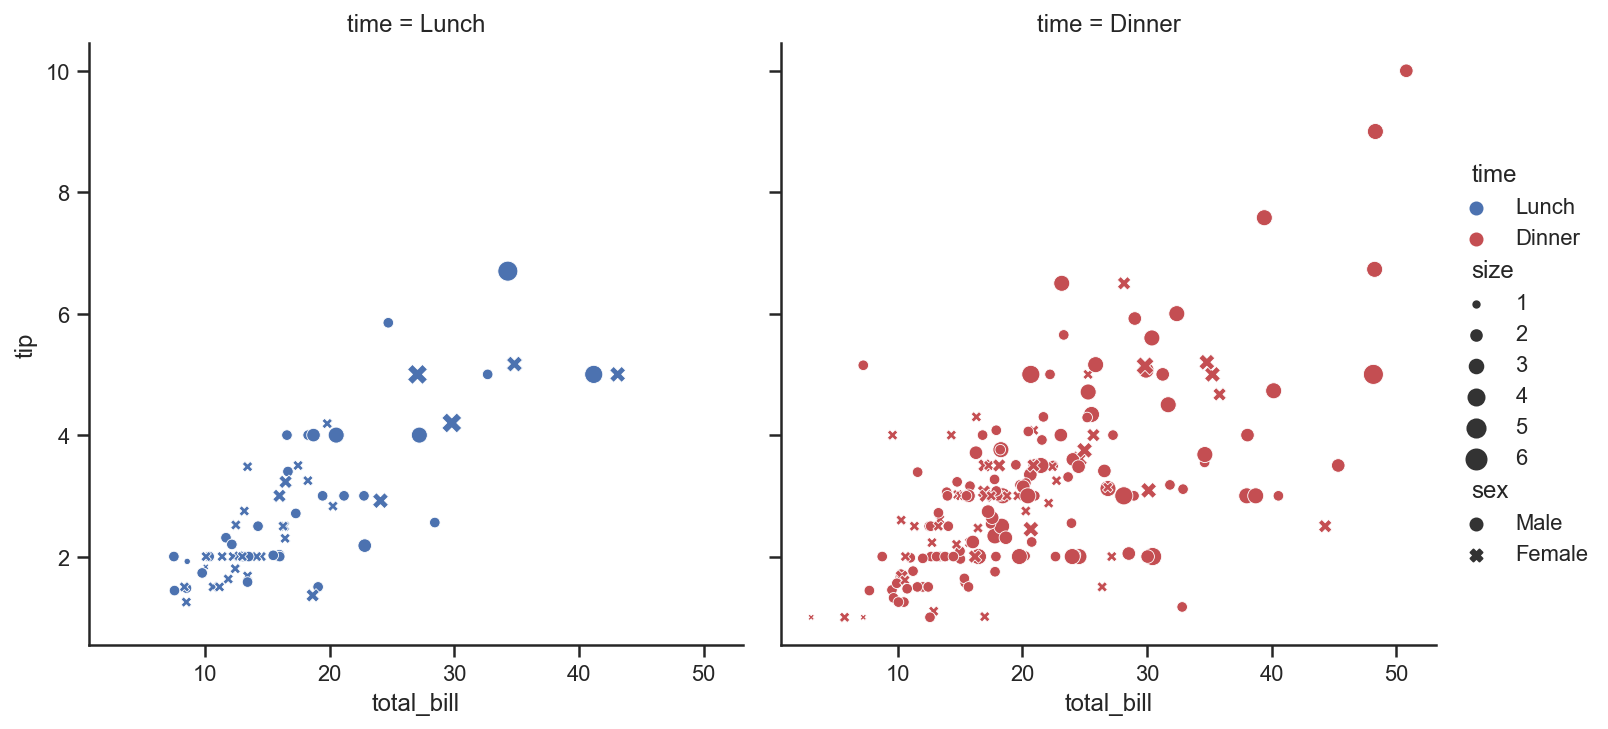

In [103]:
# 마커의 사이즈, col 구분, 마커 style을 지정한 차트입니다.

sns.relplot(
    data=tips, x="total_bill", y="tip", col="time",
    hue="time", size="size", style="sex",
    palette=["b", "r"], sizes=(10, 100)
)

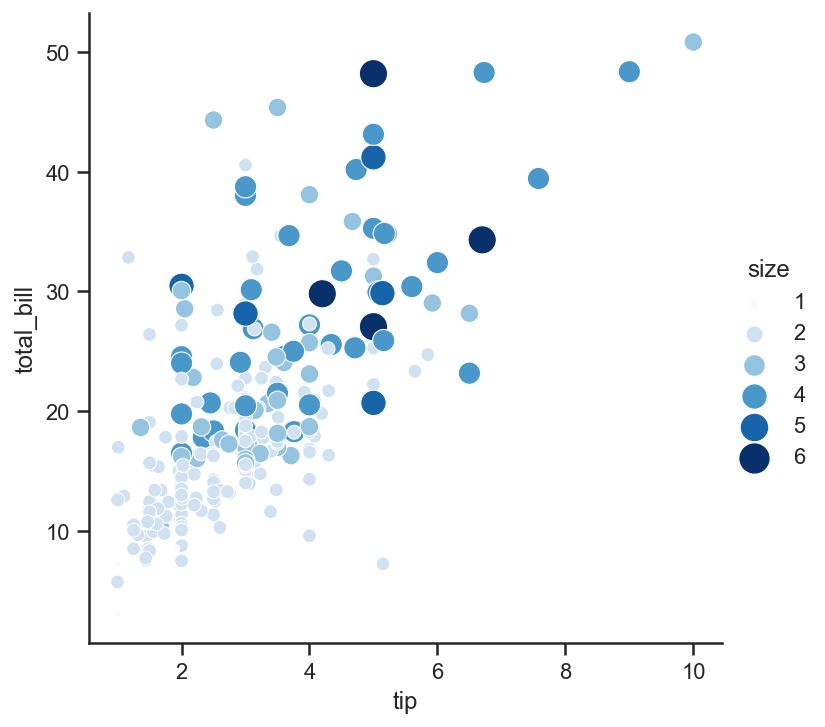

In [99]:
# 색이 마음에 들지 않느다면 pallette를 이용하고 아래와 같은 시각화도 가능합니다.

sns.relplot(
    data=tips,
    x="tip", y="total_bill",
    hue="size", size="size",
    palette='Blues', sizes=(10, 200)
)

# lmplot
---

lmplot은 각 데이터셋의 분포와 회귀선을 나타냅니다.

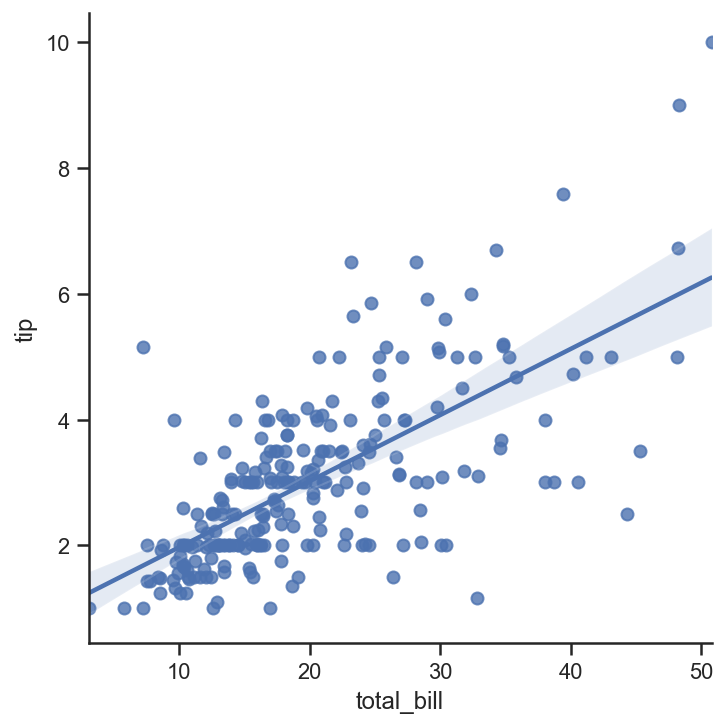

In [123]:
sns.lmplot(x="total_bill", y="tip", data=tips)

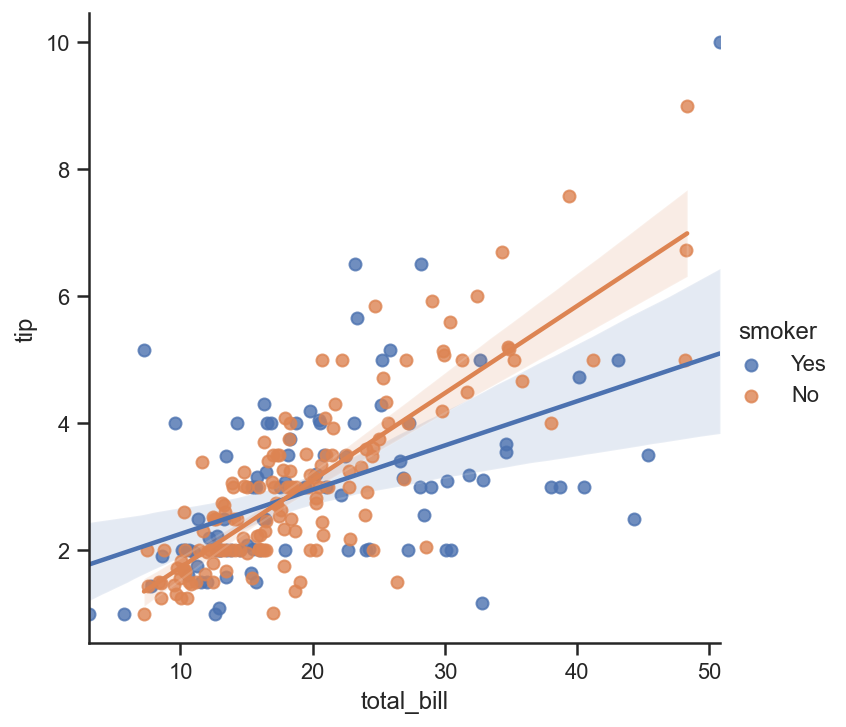

In [124]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

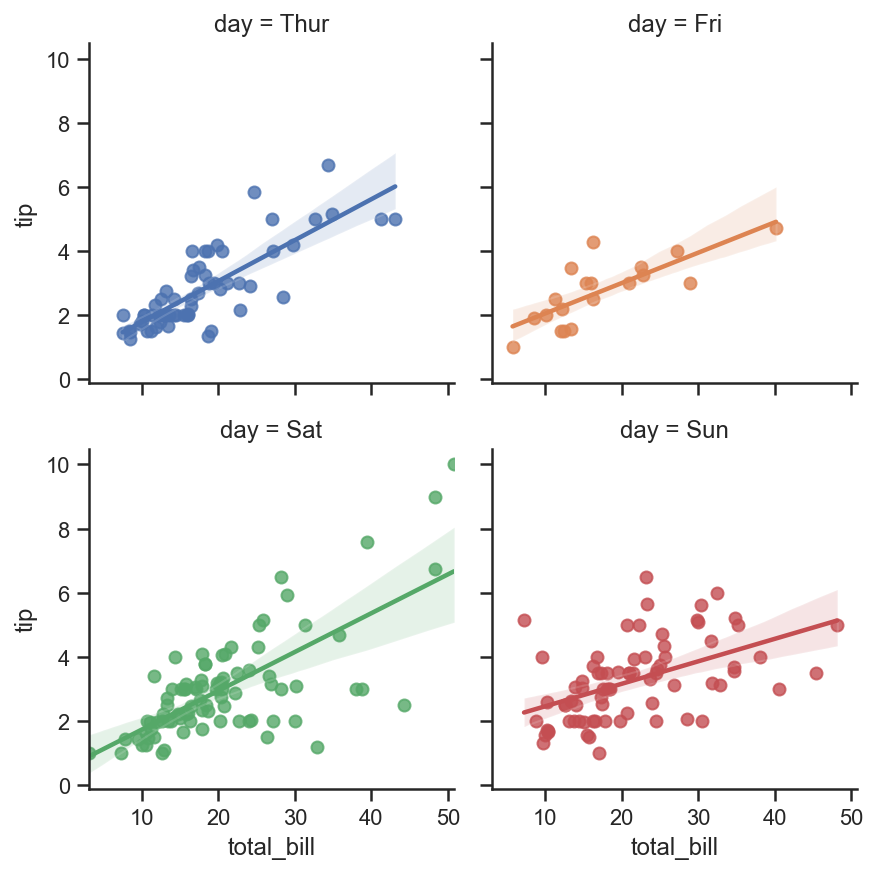

In [125]:
sns.lmplot(x="total_bill", y="tip", col="day", hue="day",
               data=tips, col_wrap=2, height=3)

# violin plot
---

https://seaborn.pydata.org/generated/seaborn.violinplot.html

- violin plot을 이용하면 각 카테고리형 변수의 y축에 대한 분포를 확인할 수 있습니다.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

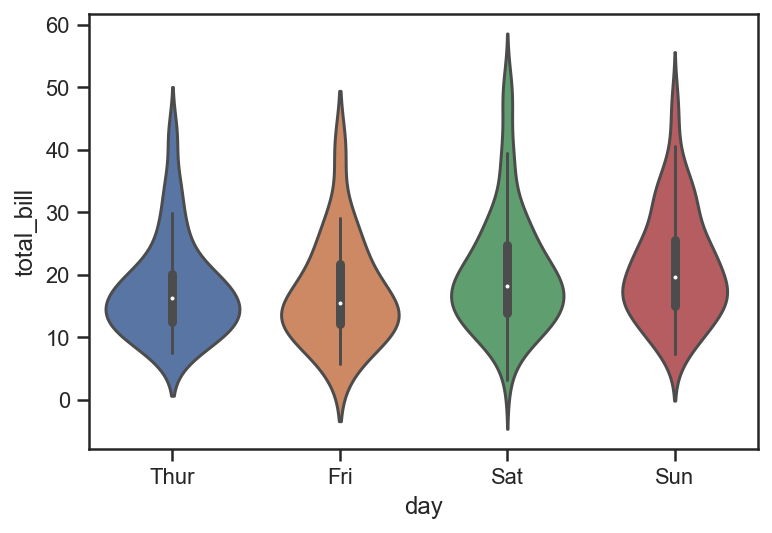

In [104]:
sns.violinplot(x="day", y="total_bill", data=tips)

In [107]:
# 아래와 같이 hue파라미터로 구분해서 시각화 할 수 있습니다.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

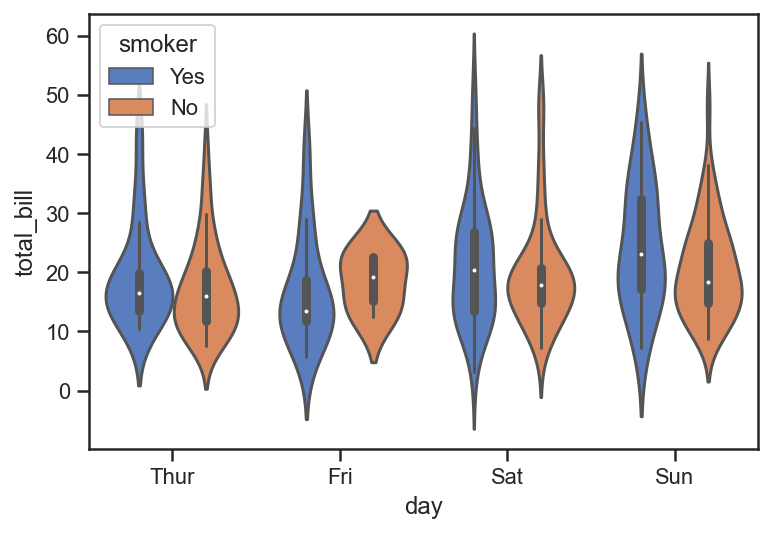

In [105]:
sns.violinplot(x="day", y="total_bill", hue="smoker",
                    data=tips, palette="muted")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

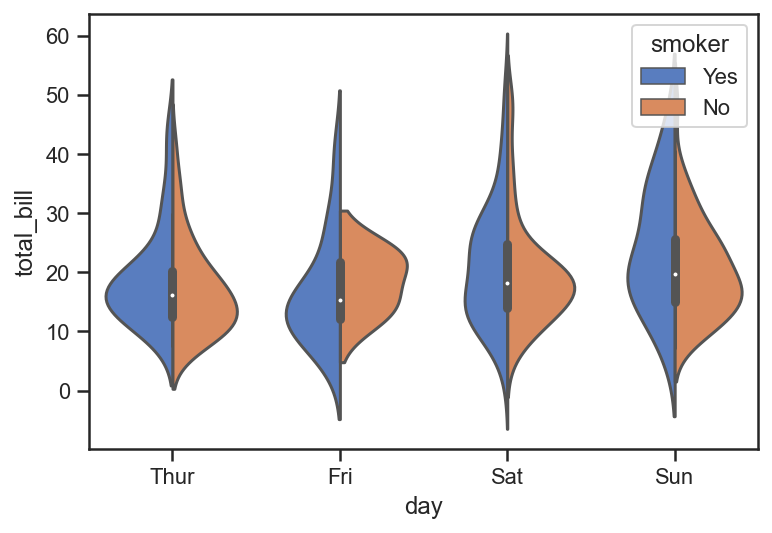

In [108]:
# violin plot의 장점은 양쪽으로 히스토그램을 표현할 수 있기 때문에 아래와 같은 방법으로 사용하는 것이 더 깔끔합니다.

sns.violinplot(x="day", y="total_bill", hue="smoker",
                    data=tips, palette="muted", split=True)

# Boxplot
---

Boxplot은 '상자 수염 그림'이라고도 불립니다.

Boxplot은 자료로부터 얻어낸 5가지 요약 수치를 시각화합니다.(최솟값, 1사분위, 2사분위, 3사분위, 최댓값)

Boxplot을 이용하면 앞서 설명한 5가지 통계량과 IQR을 이용한 아웃라이어 파악이 가능합니다.ㅡ

Boxplot에 대한 설명은 아래의 그림을 통해 이해할 수 있습니다.

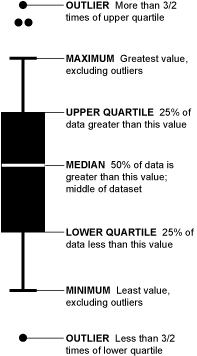

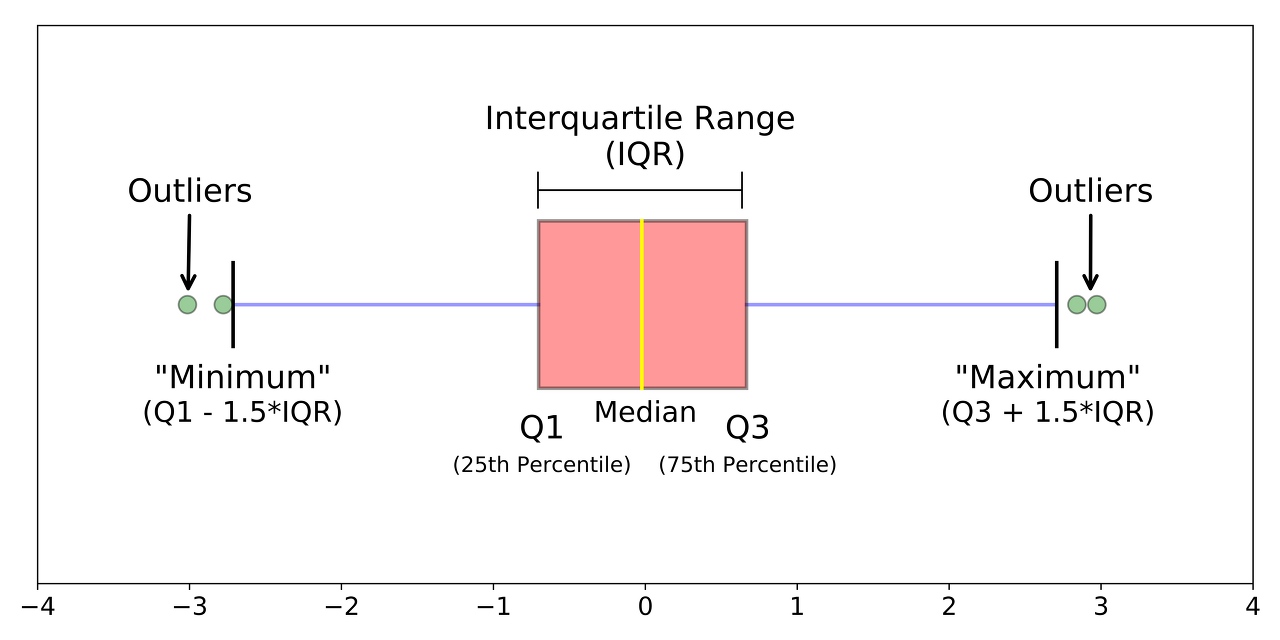

<AxesSubplot:xlabel='day', ylabel='total_bill'>

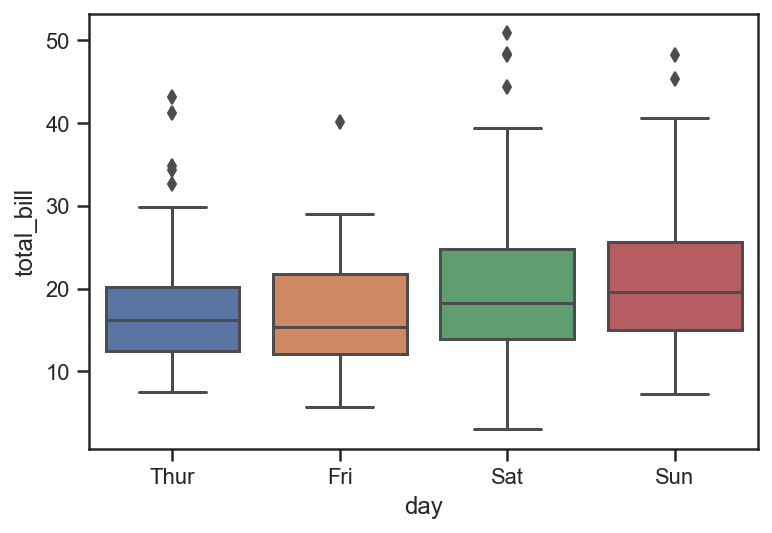

In [111]:
sns.boxplot(x="day", y="total_bill", data=tips)

# Heatmap
---

Heatmap은 두개의 범주형 자료에 대한 계급별 연속형 자료로 집계된 데이터를 시각화합니다.

아래의 예시와 같이 피벗테이블을 이용한 집계 자료 또는 변수간 상관관계를 시각화 할 때 유용하게 사용됩니다.

In [14]:
# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='year', ylabel='month'>

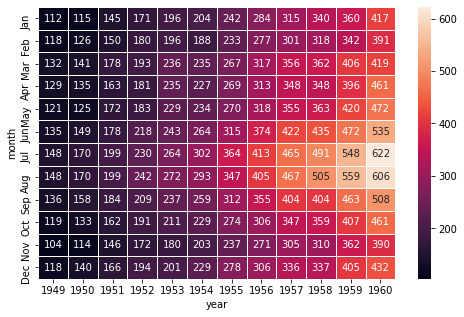

In [15]:
# Draw a heatmap with the numeric values in each cell
plt.figure(figsize=(8, 5))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)

# pairplot
---

pairplot은 각 변수에 대한 상관관계나 분류적 특성을 확인하기에 용이하지만 데이터셋일 클수록 그래프를 그리는 시간이 오래걸린다는 단점이 있습니다.

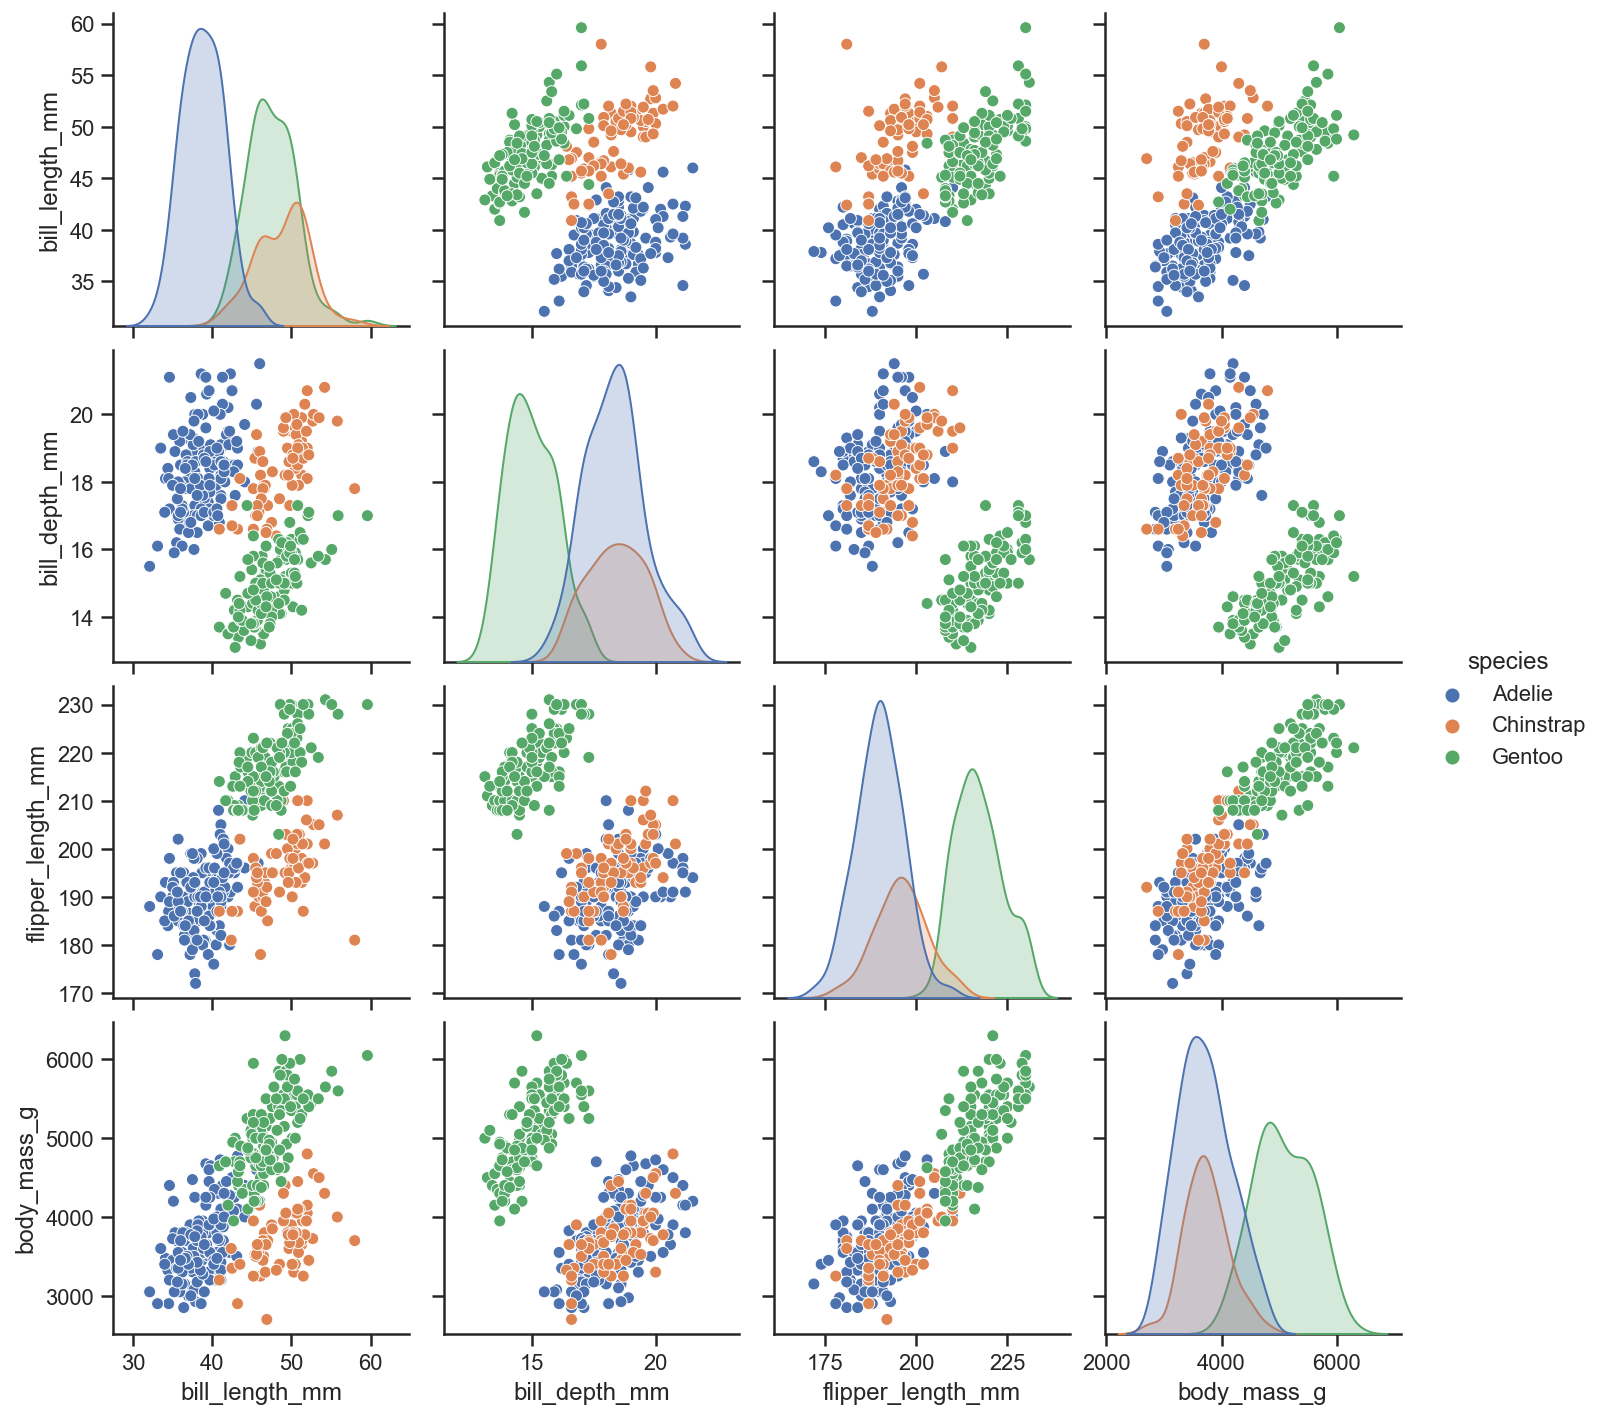

In [115]:
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

# joint plot
---

jointplot을 이용하면 두개의 수치형 변수 간의 관계를 파악할 수 있습니다.

차트의 중앙에는 상관관계를 그려주는 산점도, 헥스빈, 2D 히스토그램, 2D 밀도(density) 플롯을 사용할 수 있습니다.

그래프의 상단과 우측에 있는 marginal 그래프는 히스토그램 또는 밀도 플롯을 사용해 두 변수의 분포를 보여줍니다.

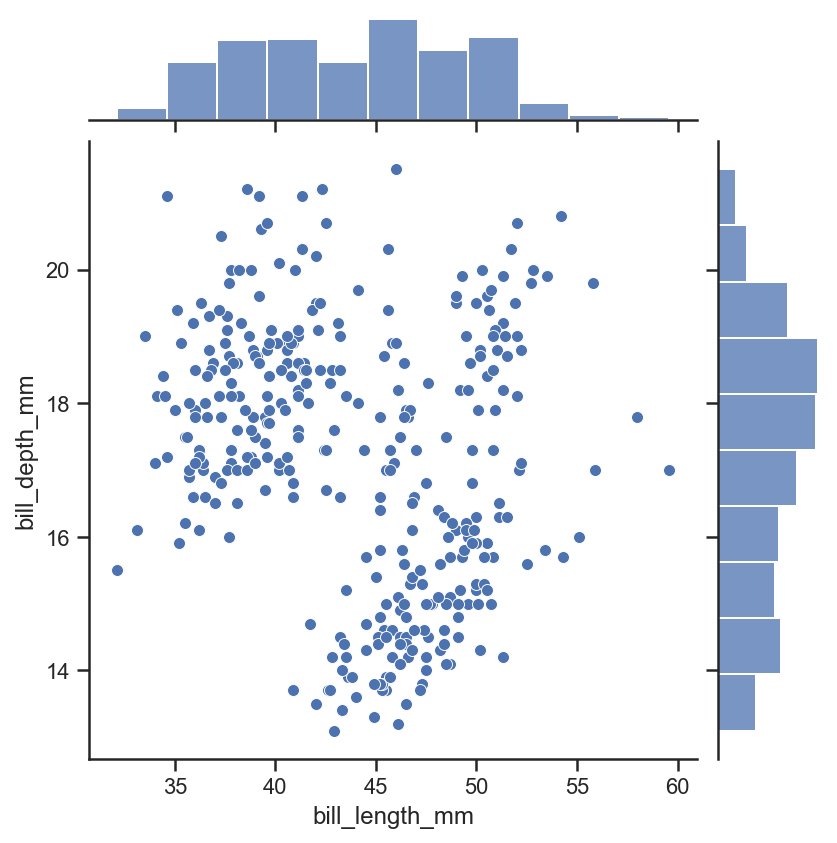

In [117]:
sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm")

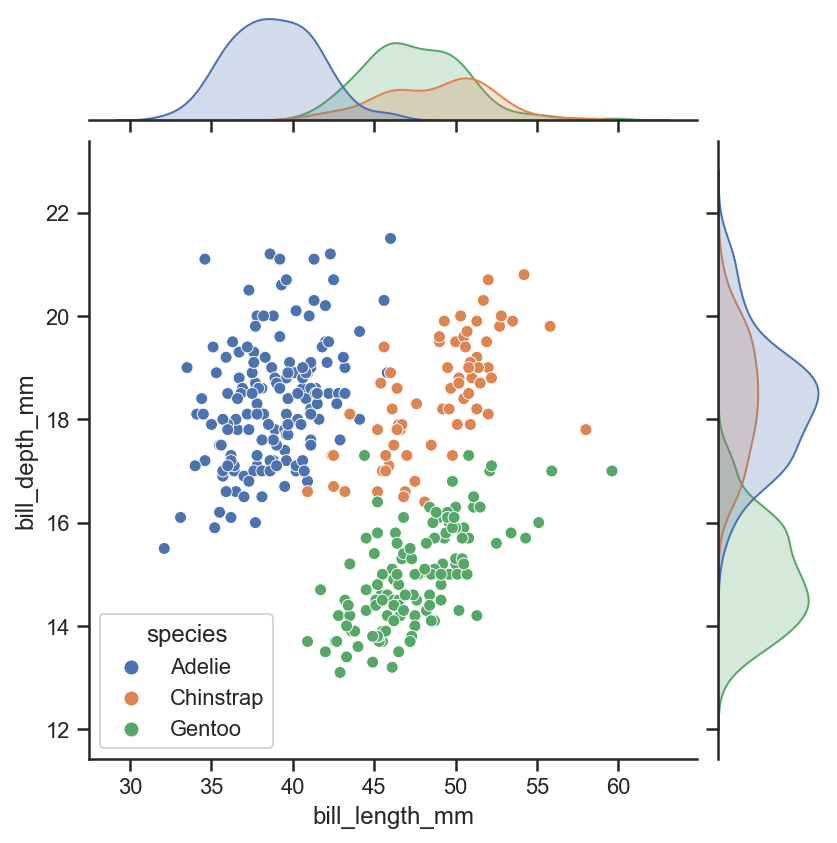

In [118]:
sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")

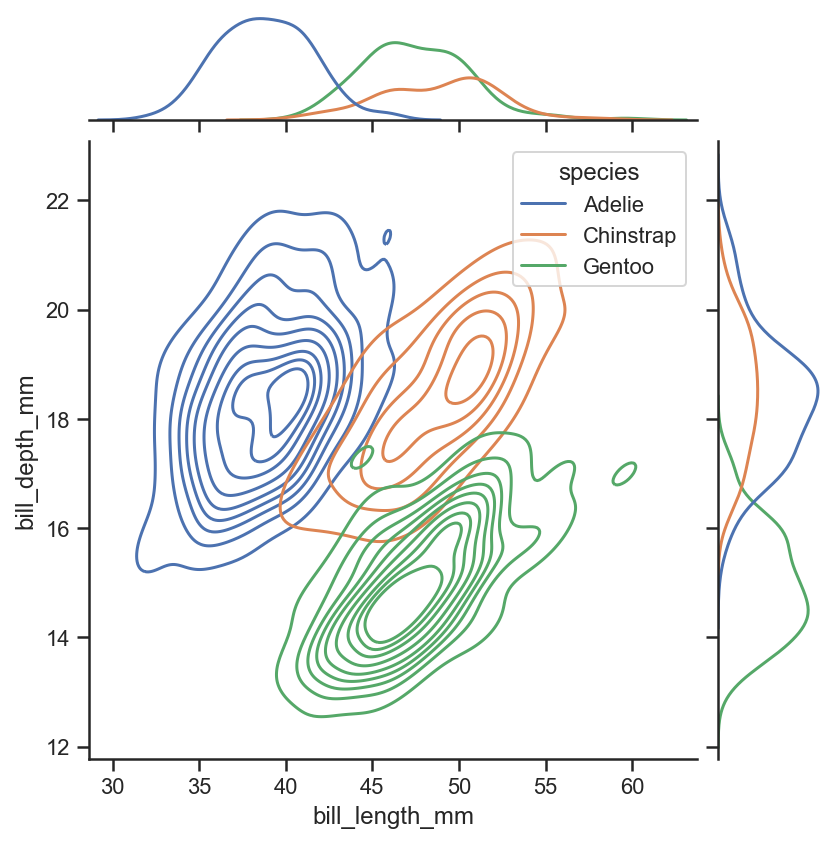

In [119]:
sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

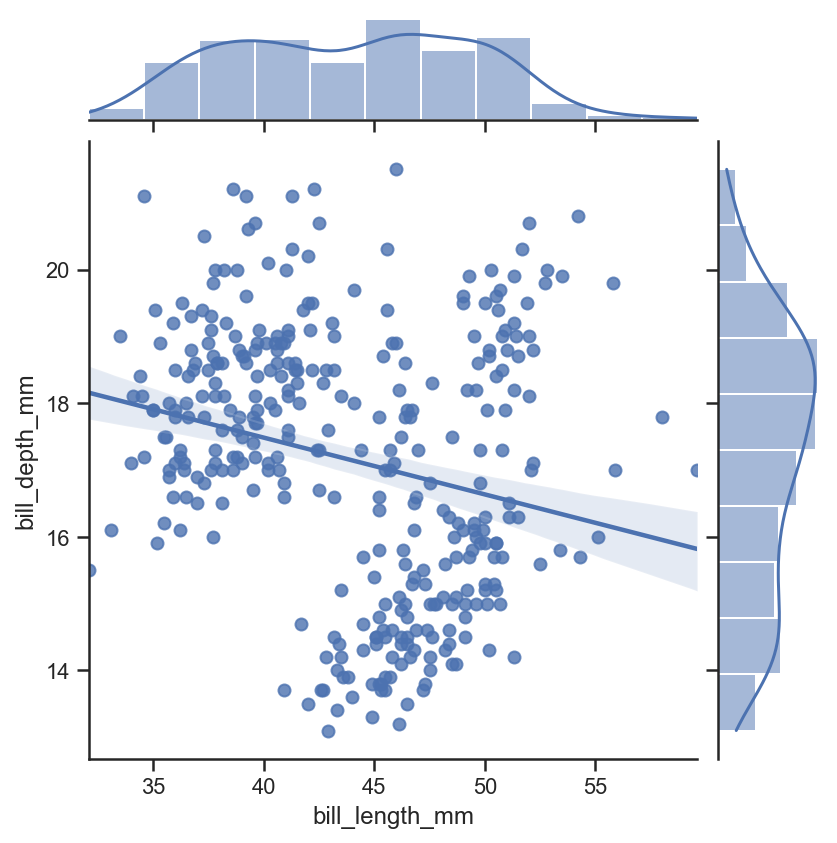

In [120]:
sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm", kind="reg")

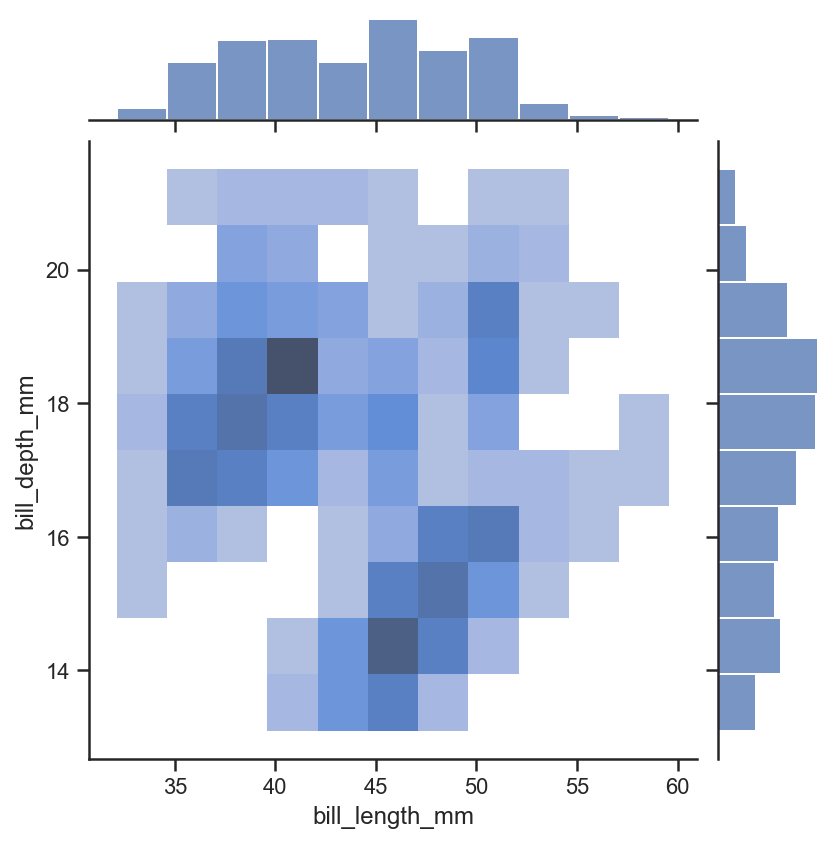

In [121]:
sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm", kind="hist")

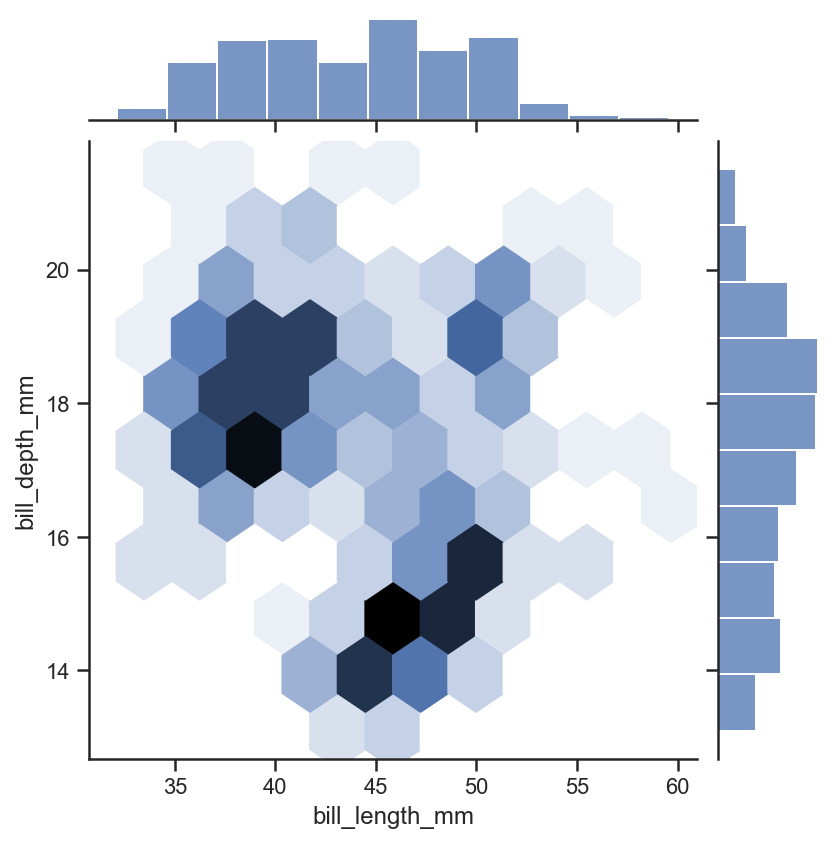

In [122]:
sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm", kind="hex")